# Exploring Interaction Effects in Linear Regression: A Simulation Study
**Name:** Alan Lin 

## Motivation
This project explores how **interaction and polynomial terms** affect **linear regression model performance**. Using a simulated dataset with a known response function, we examine how including or omitting predictors impacts **coefficient estimates** and overall model fit. The analysis emphasizes careful model specification and its role in accurate inference, building on concepts introduced in ISLP.

## Data Analysis
### Importing Necessary Dependencies
We begin by importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from ISLP.models import summarize

### Simulating Independent Variables

We first generate independent variables for our linear regression models. 
- `x1` is sampled from a Unif[-9,9] distribution.  
- `x2` is sampled from a Gamma(8, 3) distribution.  

We then visualize the distributions using histograms to check that they match expectations.

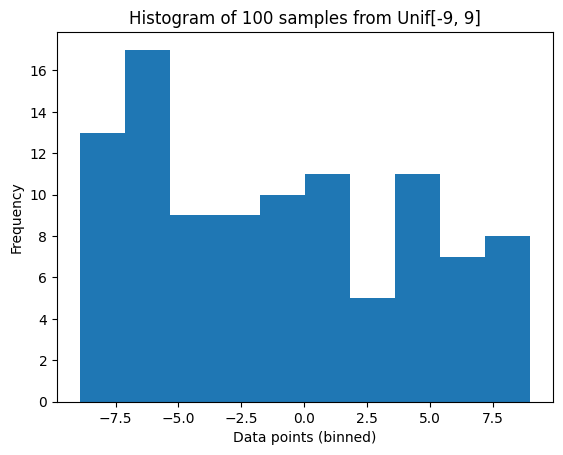

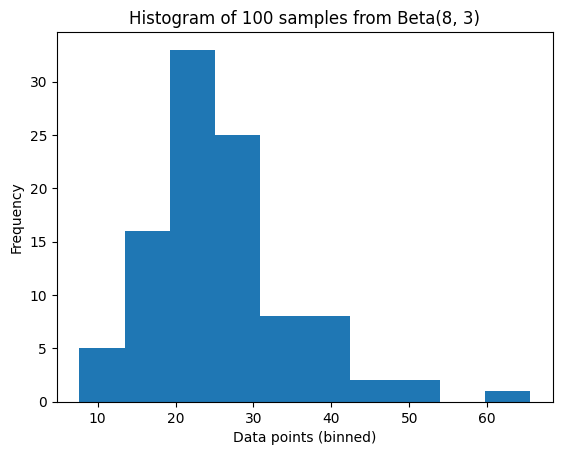

In [2]:
np.random.seed(333) # Set seed for reproducibility

# Generate independent variables:
# x1: 100 samples from Unif[-9, 9]
x1 = np.random.uniform(-9.0, 9.0, 100)

# x2: 100 samples from Gamma(alpha=8, beta=3)
x2 = np.random.gamma(8, 3, 100)

# Plot histograms to visualize distributions
plt.hist(x1)
plt.title("Histogram of 100 samples from Unif[-9, 9]")
plt.xlabel("Data points (binned)")
plt.ylabel("Frequency")
plt.show()

plt.hist(x2)
plt.title("Histogram of 100 samples from Beta(8, 3)")
plt.xlabel("Data points (binned)")
plt.ylabel("Frequency")
plt.show()

### Adding Random Noise
We next generate an independent variable `noise` representing random noise $\epsilon$ for our linear regression models. 
- `noise` is sampled from a Normal(0,1) distribution.

We then visualize the distribution using a histogram to ensure it matches expectations.

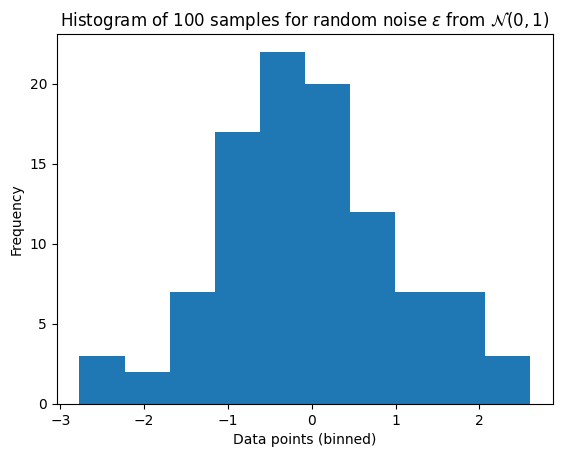

In [3]:
np.random.seed(333)  # Ensure reproducibility consistent with earlier simulation

# Generate independent variable `noise`: 100 samples from Normal(0,1)
noise = np.random.normal(0, 1, 100)

# Plot histogram to visualize distribution
plt.hist(noise)
plt.title("Histogram of 100 samples for random noise $\epsilon$ from $\mathcal{N}(0,1)$")
plt.xlabel("Data points (binned)")
plt.ylabel("Frequency")
plt.show()

### Creating Response Variable `y`

We generate a response variable `y` for our simulated dataset using a linear model with an interaction term:  

$$y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \beta_3 x_{i1} x_{i2} + \epsilon_i$$

Here, we set the coefficients to:  
- $\beta_0 = 2$ 
- $\beta_1 = -2$  
- $\beta_2 = 1$
- $\beta_3 = 0.7$

and use `noise` for the random error term $\epsilon_i$. We then visualize the distribution of `y` using a histogram.

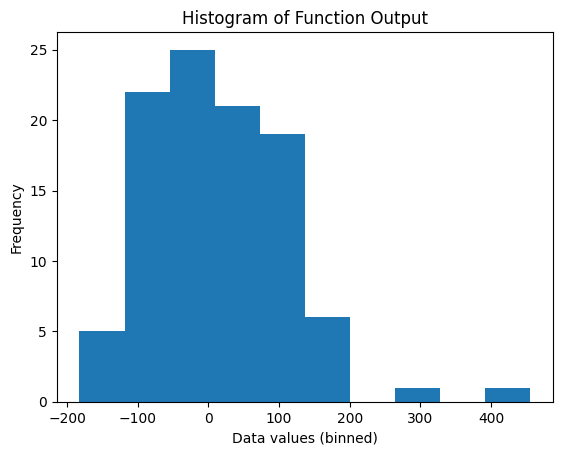

In [4]:
# Define coefficients
beta0 = 2
beta1 = -2
beta2 = 1
beta3 = 0.7

# Compute response variable `y`
y = beta0 + beta1*x1 + beta2*x2 + beta3*x1*x2 + noise

# Plot histogram to visualize distribution
plt.hist(y)
plt.title("Histogram of Function Output")
plt.xlabel("Data values (binned)")
plt.ylabel("Frequency")
plt.show()

### Fitting Least Squares Linear Model
We now fit an ordinary least squares (OLS) model to predict `y` using `x1` and `x2`. We will print a summary of the results and compare the estimated coefficients with the true coefficient values used to generate the data.

In [5]:
# Create DataFrame `X_simple` with intercept and independent variables
X_simple = pd.DataFrame({'intercept': np.ones(x1.shape[0]), 'x1': x1, 'x2': x2})

# Define OLS model using response variable `y` and predictors `X_simple`
model = sm.OLS(y, X_simple)

# Fit the model to the simulated dataset
results_simple = model.fit()

# Print summary of the fitted model
summarize(results_simple)

,coef,std err,t,P>|t|
intercept,-15.9373,10.634,-1.499,0.137
x1,16.4703,0.683,24.117,0.000
x2,1.7747,0.385,4.615,0.000


The estimated linear regression coefficients differ noticeably from the values used to generate the data: 

- True: $\beta_0 = 2$, $\beta_1 = -2$, $\beta_2 = 1$ 
- Estimated: $\hat{\beta}_0 \approx -15.94$, $\hat{\beta}_1 \approx 16.47$, $\hat{\beta}_2 \approx 1.77$

While $\hat{\beta}_2$ is somewhat close to the true value, $\hat{\beta}_0$ and $\hat{\beta}_1$ differ drastically. These discrepancies occur because the model does not include the interaction term $x_1x_2$, causing the effect of $x_1$ to be misrepresented and the intercept $\beta_0$ to vary significantly from the true value. The results illustrate how omitting relevant interaction terms can substantially bias the estimated coefficients in linear regression.

### Fitting OLS Model with Quadratic and Interaction Terms
We extend our previous linear model by adding quadratic terms $x_1^2$, $x_2^2$, and an interaction term $x_1x_2$. We will fit this expanded model, print the summary, and compare the estimated coefficients to the true values and the simpler model from the previous section. 

In [6]:
# Create DataFrame `X_expanded` with intercept, independent variables, polynomial terms, and interaction term
X_expanded = pd.DataFrame({
    'intercept': np.ones(x1.shape[0]),
    'x1': x1,
    'x2': x2,
    'x1_sq': x1**2,
    'x2_sq': x2**2,
    'x1x2': x1*x2
})

# Define OLS model using response variable `y` and predictors `X_expanded`
model = sm.OLS(y, X_expanded)

# Fit the model to the simulated dataset
results_expanded = model.fit()

# Print summary of the fitted model
summarize(results_expanded)

,coef,std err,t,P>|t|
intercept,1.2853,0.718,1.789,0.077
x1,-1.9886,0.061,-32.480,0.000
x2,1.0675,0.048,22.086,0.000
x1_sq,-0.0060,0.004,-1.417,0.160
x2_sq,-0.0012,0.001,-1.560,0.122
x1x2,0.6988,0.002,310.503,0.000


The expanded model, including $x_1$, $x_2$, and the interaction term $x_1x_2$, accurately recovers the true coefficients used to generate the data:
- True: $\beta_0 = 2$, $\beta_1=-2$, $\beta_2=1$, $\beta_3=0.7$
- Estimated: $\hat{\beta}_0 \approx 1.29$, $\hat{\beta}_1 \approx -1.99$, $\hat{\beta}_2 \approx 1.07$, $\hat{\beta}_3 \approx 0.7$

Including the interaction term substantially improves model accuracy compared to the simpler model with only $x_1$ and $x_2$. The estimated intercept $\hat{\beta}_0$ also becomes closer to the true value. The quadratic terms $x_1^2$ and $x_2^2$ are not statistically significant (p-values > 0.1), indicating they do not meaningfully contribute to the model and can be dropped. Even with Bonferroni (multiple-testing) corrections, these terms remain insignificant.

### Sanity Check: True Model Recovery
To verify the performance of our models, we fit a linear model including exactly the terms used to generate `y` ($x_1$, $x_2$, and $x_1x_2$). 

In [7]:
# Create DataFrame `X_true` with intercept and independent variables
X_true = pd.DataFrame({'intercept': np.ones(x1.shape[0]), 'x1': x1, 'x2': x2, 'x1x2': x1*x2})

# Define OLS model using response variable `y` and predictors `X_true`
model = sm.OLS(y, X_true)

# Fit the model to the simulated dataset
results_true = model.fit()

# Print summary of the fitted model
summarize(results_true)

,coef,std err,t,P>|t|
intercept,2.1393,0.314,6.810,0.0
x1,-1.9476,0.058,-33.594,0.0
x2,0.9932,0.011,86.897,0.0
x1x2,0.6971,0.002,338.190,0.0


The estimated coefficients closely match the true values:
- True: $\beta_0 = 2$, $\beta_1=-2$, $\beta_2=1$, $\beta_3=0.7$
- Estimated: $\hat{\beta}_0 \approx 2.14$, $\hat{\beta}_1 \approx -1.95$, $\hat{\beta}_2 \approx 0.99$, $\hat{\beta}_3 \approx 0.7$

These results confirm that our modeling procedure accurately reflects the coefficients used to generate the response variable. All estimated coefficients are statistically significant (p-values $=$ 0), demonstrating that the true underlying relationships are correctly captured by the model. This serves as a sanity check validating our previous analyses with the simple and expanded models.

### Model Comparison via ANOVA
We now perform an ANOVA F-test to compare the simple model ($x_1$ and $x_2$) with the expanded model ($x_1$, $x_2$, $x_1^2$, $x_2^2$, and $x_1x_2$). The F-test will determine whether the additional terms in the expanded model significantly improve the fit compared to the simpler model.

We will report:
- The F-statistic
- The relevant degrees of freedom
- The p-value

Based on these results, we will identify which model provides the better fit to the data and interpret the estimated coefficients of that model.

In [8]:
# Compare simple and expanded models using an ANOVA F-test
anova_results = anova_lm(results_simple, results_expanded)
anova_results

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,97.0,126180.641202,0.0,NaN,NaN,NaN
1,94.0,101.126265,3.0,126079.514937,39064.939916,2.364408e-145


An F-test comparing the simple model and the expanded model demonstrates that the expanded model provides a significantly better fit. The F-statistic is $F = 39,064.94$ with $df = 94$ degrees of freedom, and the p-value is effectively zero ($2.36 \times 10^{-145}$), indicating strong evidence against the null hypothesis that the simple model suffices.

We now interpret the estimated coefficients of the expanded model:
- **Intercept ($\hat{\beta}_0 \approx 1.285$):** predicted value of response variable $y$ when all predictors are zero.
- **$x_1$ ($\hat{\beta}_1 \approx -1.989$):** each unit increase in $x_1$ (from Unif[-9,9]) decreases $y$ by $1.989$, holding other factors constant. 
- **$x_2$ ($\hat{\beta}_2 \approx 1.068$):** each unit increase in $x_2$ (from Gamma(8,3)) increases $y$ by $1.068$, holding other factors constant.
- **Quadratic terms ($x_1^2$ and $x_2^2$):** coefficients are near zero and not statistically significant ($p > 0.1$), indicating minimal contribution.
- **Interaction term ($x_1x_2$, $\hat{\beta}_3 \approx 0.699$):** captures the combined effect of $x_1$ and $x_2$, increasing $y$ by $0.699$ per unit increase beyond individual contributions.

The results confirm that including the interaction term is critical for capturing the underlying relationship in the data, substantially improving model accuracy compared to the simpler model.

## Key Takeaways
**Overall:** Properly specifying models—including relevant interaction terms—is crucial for accurate coefficient estimation and reliable inference in linear regression.
- **Interaction terms matter:** Including $x_1x_2$ significantly improved model fit compared to the simple model.
- **Coefficient recovery:** Estimated coefficients from the expanded model closely matched the true generating values.
- **Quadratic terms negligible:** $x_1^2$ and $x_2^2$ were not statistically significant and contributed minimally.
- **ANOVA confirmation:** F-test strongly favored the expanded model ($F = 39,064.94$, $df = 94$, $p \approx 0$).
- **Sanity check validation:** Fitting the model with the exact generating terms confirmed the accuracy of our approach.